In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,confusion_matrix , r2_score, classification_report


In [34]:
# used for binary classification
# multi class 
# one vs rest 

# assumptions of logistic regression : 
# dependent variable must be categorical 
# independent variable must be continuous
# no outliers 
# no high correlations



In [35]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
# preprocessing the data 

df.drop("deck", axis=1, inplace = True)

# impute missing values in age and fare mean 
df["age"].fillna(df["age"].mean(), inplace = True)
df["fare"].fillna(df["fare"].mean(), inplace = True)

# impute embark town and emabark with mode 
df["embarked"].fillna(df["embarked"].mode()[0], inplace = True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace = True)

# encode the categorical values using loop 
le = LabelEncoder()

for col in df.columns :
    if df[col].dtypes == "object"  or df[col].dtypes == "category":
        df[col] = le.fit_transform(df[col])
        
        
df.head()        








,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [37]:
X = df.drop("survived", axis = 1)
y = df["survived"]

In [38]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [30]:
# train the model 
# model.fit(X_train, y_train)

In [39]:
model = LogisticRegression()

model.fit(X_train, y_train)

/home/talha/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[105   0]
 [  0  74]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

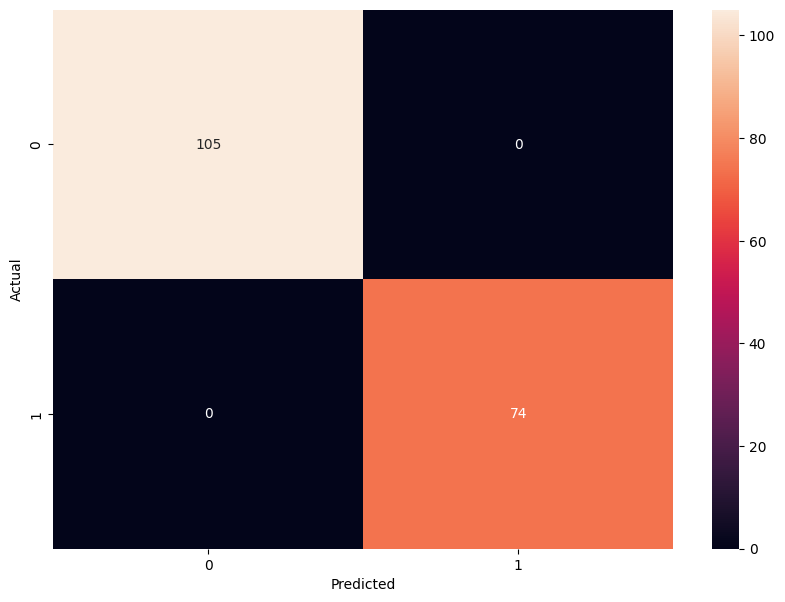

In [42]:
# plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [43]:
# save the model
import pickle
pickle.dump(model, open('./saved_models/logistic_regression.pkl', 'wb'))